# Model comparison pipeline

- Pipeline components:
    - normalisation + scaling
    - imputation
    - ML model

- Took care that `random seeds` are fixed, so models get compared with the same split!

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns

from modelsClassifier import fit_modelComparison

sns.set_theme(style="whitegrid", palette=None, font_scale=1.2)

# Classification pipeline

In [10]:
datasetTimepoint = "12_hospitalization"
target = "disease_severity"
#### Normally:
varPath = f"../../results/featureSelection/{datasetTimepoint}/boruta.txt"

''' 
Define paths
'''
resultsPath = f"../../results/prediction/featureSelection/{datasetTimepoint}/boruta/modelComparison"
os.makedirs(resultsPath, exist_ok=True)
dataPath = "../../results/preprocessing/cleaned"
dataset = f"{datasetTimepoint}_{target}_cleaned.csv"

In [11]:
''' 
Read data
'''
data = pd.read_csv(f"{dataPath}/{dataset}", index_col=0)
X = data.drop(target, axis=1)
y = data[target]

''' 
Read in variables
'''
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()

''' 
Run pipeline

--model: RandomForest, LogReg, KNN, GBoost, MLP

'''
for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    estimators, score = fit_modelComparison(X, y, target, sel_variables, model=model, randomState=11)

    ### Save
    score["model"] = np.repeat(model, len(score["fit_time"]))
    pd.DataFrame.from_dict(score).to_csv(f"{resultsPath}/{model}_score.csv", index=None) 

    ### Save feature importances if possible
    if model == "RandomForest":
        columnOrderAfterPreprocessing = estimators[0].best_estimator_["selector"].get_feature_names()
        fi_rf = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
        df_fi_rf = pd.DataFrame(fi_rf, columns=["fi", "var"]).sort_values("fi", ascending=False)    
        df_fi_rf.to_csv(f"{resultsPath}/{model}_featureImportance.csv", index=None)


Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...


Fitting estimator...



/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/skatz/miniconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged ye

# Comparison of all models

In [6]:
df_scores = pd.DataFrame()

for model in ["RandomForest", "LogReg", "KNN", "GBoost", "MLP"]:
    df = pd.read_csv(f"{resultsPath}/{model}_score.csv")
    df_scores = pd.concat([df_scores, df], axis=0, ignore_index=True)

df_scores

,fit_time,score_time,test_acc,test_b_acc,test_recall,test_precision,test_roc_auc_micro,test_roc_auc_macro,test_f1,test_f1_micro,test_f1_macro,test_f1_weighted,test_fbeta,model
0,5.702958,0.083101,0.818182,0.616667,0.933333,0.857143,0.598889,0.598889,0.893617,0.818182,0.634309,0.799323,0.917031,RandomForest
1,5.514789,0.171852,0.818182,0.577778,0.955556,0.843137,0.551111,0.551111,0.895833,0.818182,0.590774,0.784903,0.930736,RandomForest
2,5.194172,0.258823,0.814815,0.615909,0.931818,0.854167,0.684091,0.684091,0.891304,0.814815,0.633152,0.795692,0.915179,RandomForest
3,5.392969,0.034043,0.854545,0.600000,1.000000,0.849057,0.636667,0.636667,0.918367,0.854545,0.625850,0.811998,0.965665,LogReg
4,6.470397,0.078401,0.818182,0.500000,1.000000,0.818182,0.668889,0.668889,0.900000,0.818182,0.450000,0.736364,0.957447,LogReg
5,8.118505,0.244411,0.796296,0.527273,0.954545,0.823529,0.698864,0.698864,0.884211,0.796296,0.519028,0.748958,0.925110,LogReg
6,5.720277,0.033861,0.836364,0.627778,0.955556,0.860000,0.598889,0.598889,0.905263,0.836364,0.652632,0.813397,0.934783,KNN
7,4.430209,0.079067,0.818182,0.655556,0.911111,0.872340,0.557778,0.557778,0.891304,0.818182,0.667874,0.810057,0.903084,KNN
8,6.091555,0.311328,0.814815,0.693182,0.886364,0.886364,0.729545,0.729545,0.886364,0.814815,0.693182,0.814815,0.886364,KNN
9,32.174902,0.034249,0.818182,0.538889,0.977778,0.830189,0.650000,0.650000,0.897959,0.818182,0.532313,0.764997,0.944206,GBoost


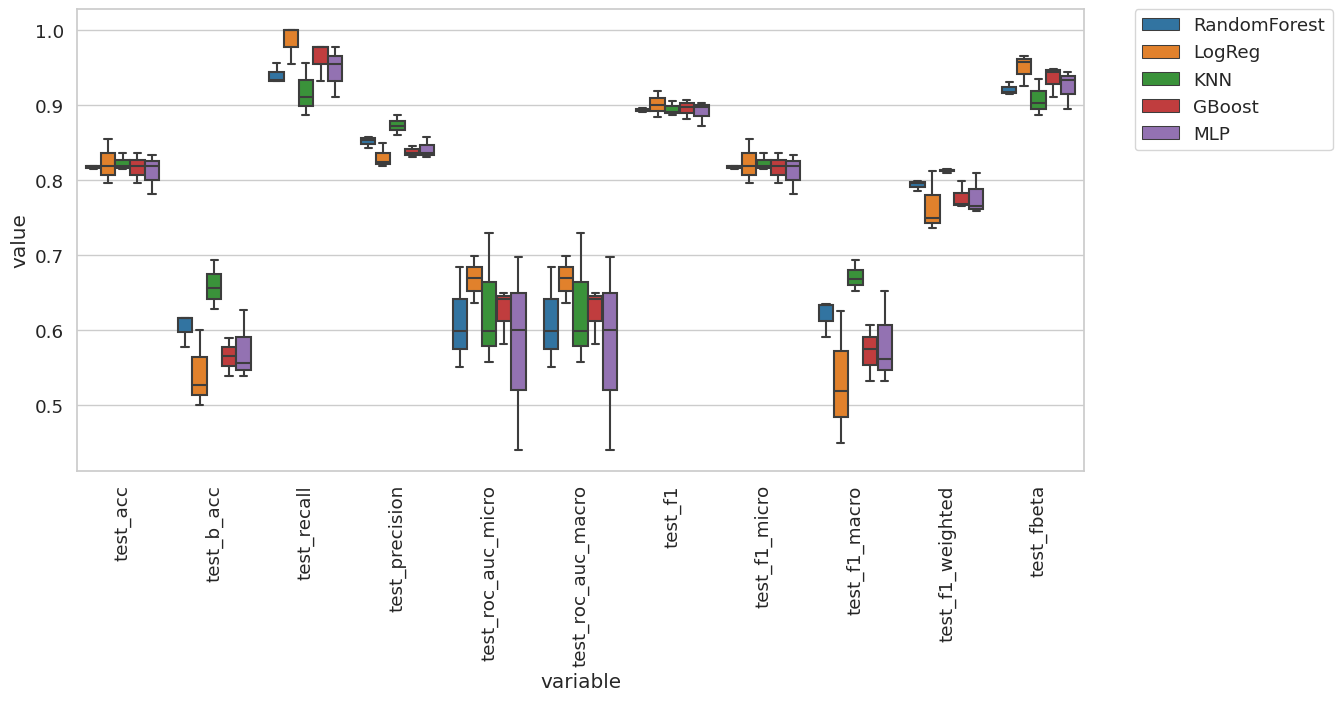

In [7]:
df_plot = df_scores.drop(["fit_time", "score_time"], axis=1)
df_plot = df_plot.melt("model")

fig, ax = plt.subplots(figsize=(13,6))
sns.boxplot(data=df_plot, x="variable", y="value", hue="model")
ax.tick_params(axis='x', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Inspect feature importances

## Random Forest

Text(0.5, 1.0, 'RandomForest')

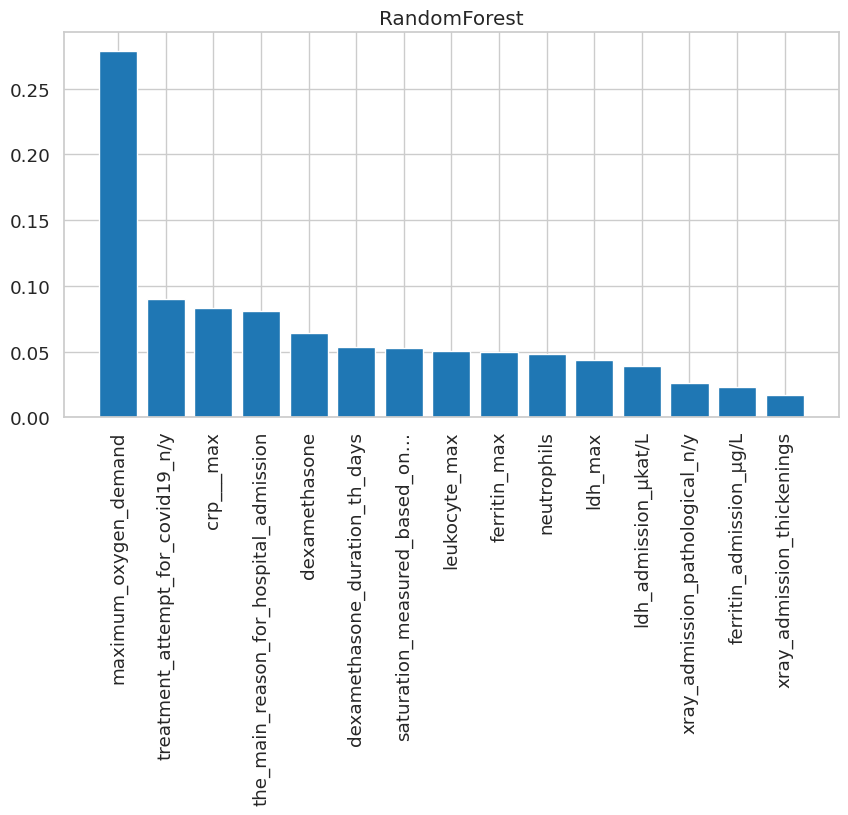

In [26]:
df = pd.read_csv(f"{resultsPath}/RandomForest_featureImportance.csv")

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_rf["var"], df_fi_rf["fi"])
ax.tick_params(axis='x', rotation=90)
plt.title(f"RandomForest")

## Gradient Boosting

In [ ]:
model = "GBoost"
estimators, score = fit_modelComparison(X, y, target, model=model, randomState=11)

fi_gboost = list(zip(estimators[0].best_estimator_[model].feature_importances_, columnOrderAfterPreprocessing))
df_fi_gboost = pd.DataFrame(fi_gboost, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_gboost

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_gboost.iloc[:10,]["var"], df_fi_gboost.iloc[:10,]["fi"], color="darkred")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")

## Logistic Regression

In [ ]:
model = "LogReg"
estimators, score = fit_modelComparison(X, y, target, model=model, randomState=11)

fi_logreg = list(zip(estimators[0].best_estimator_[model].coef_[0], columnOrderAfterPreprocessing))
df_fi_logreg = pd.DataFrame(fi_logreg, columns=["fi", "var"]).sort_values("fi", ascending=False)
df_fi_logreg

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df_fi_logreg.iloc[:10]["var"], df_fi_logreg.iloc[:10]["fi"], color="orange")
ax.tick_params(axis='x', rotation=90)
plt.title(f"{model}: top 10")